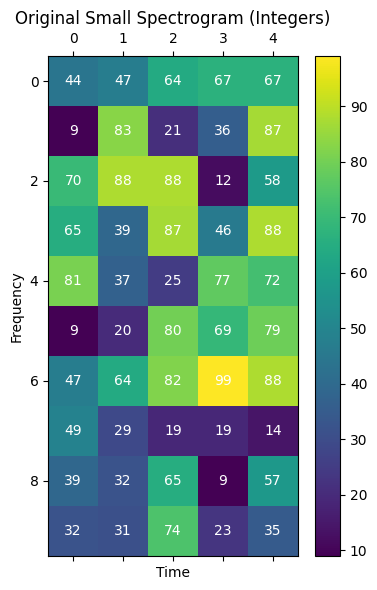

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix(matrix, title, ax, decimals=2):
    cax = ax.matshow(matrix, cmap=plt.cm.viridis)
    plt.colorbar(cax, ax=ax)
    ax.set_title(title)
    # Time and frequency axis labels
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f"{val:.{decimals}f}", ha='center', va='center', color='white')

# Let's recreate the small matrix using only integer values for the unnormalized spectrogram.
np.random.seed(0)
small_spectrogram = np.random.randint(0, 100, (10, 5))

# Plotting the matrices with actual number values
fig, axes = plt.subplots(1, 1, figsize=(4, 6))

# # Plot original small spectrogram with integer values
plot_matrix(small_spectrogram, 'Original Small Spectrogram (Integers)', axes, decimals=0)

plt.tight_layout()

plt.savefig('original.png', bbox_inches='tight', pad_inches=0.1)

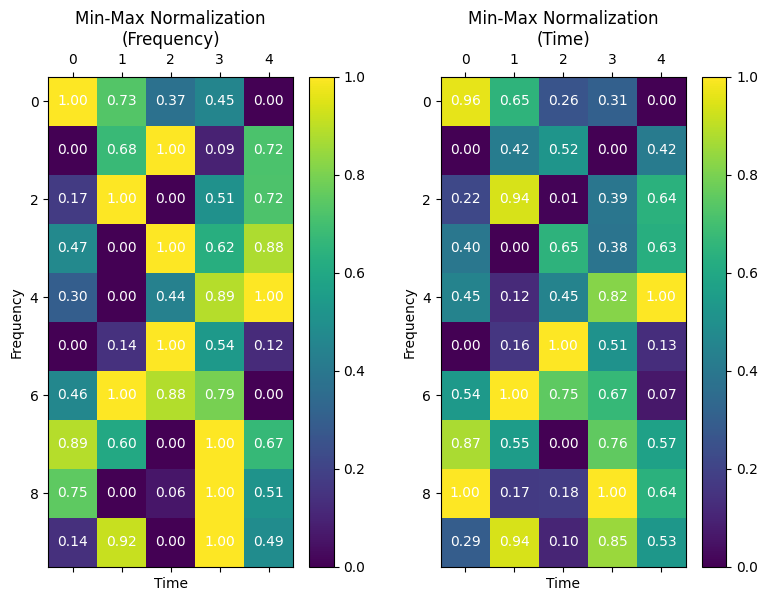

In [29]:
# Let's recreate the small matrix using only integer values for the unnormalized spectrogram.
small_spectrogram = np.random.randint(0, 100, (10, 5))

# Perform min-max normalization across the frequency dimension (rows)
min_max_norm_freq_small = (small_spectrogram - small_spectrogram.min(axis=1)[:, None]) / \
                          (small_spectrogram.max(axis=1) - small_spectrogram.min(axis=1))[:, None]

# Perform min-max normalization across the time dimension (columns)
min_max_norm_time_small = (small_spectrogram - small_spectrogram.min(axis=0)) / \
                          (small_spectrogram.max(axis=0) - small_spectrogram.min(axis=0))

# Plotting the matrices with actual number values
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# # Plot original small spectrogram with integer values
# plot_matrix(small_spectrogram, 'Original Small Spectrogram (Integers)', axes[0], decimals=0)

# Plot min-max normalization across frequency with float values
plot_matrix(min_max_norm_freq_small, 'Min-Max Normalization\n(Frequency)', axes[0])

# Plot min-max normalization across time with float values
plot_matrix(min_max_norm_time_small, 'Min-Max Normalization\n(Time)', axes[1])

plt.tight_layout()

plt.savefig('min_max_normalization.png', bbox_inches='tight', pad_inches=0.1)

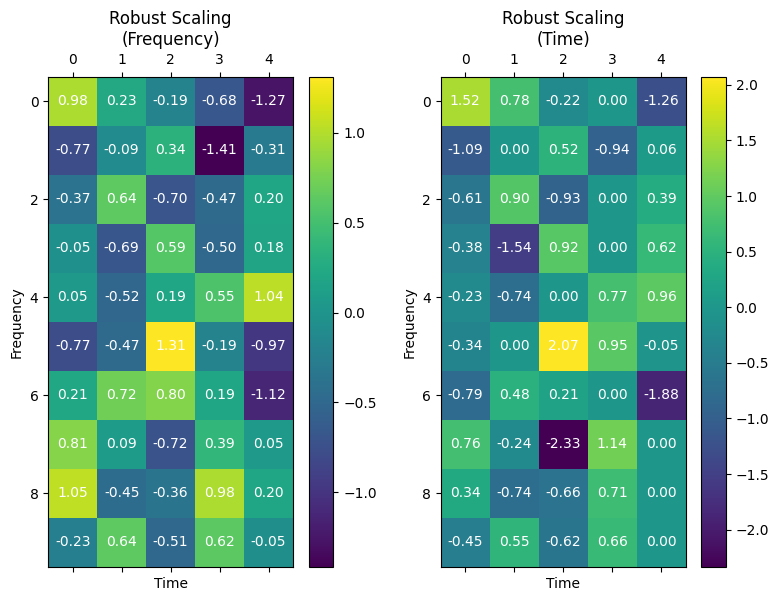

In [30]:
from sklearn.preprocessing import RobustScaler

# Function to perform robust scaling across a specified axis
def robust_scale(matrix, axis):
    scaler = RobustScaler()
    if axis == 0:  # Scale each column independently
        scaled_matrix = scaler.fit_transform(matrix.T).T
    elif axis == 1:  # Scale each row independently
        scaled_matrix = scaler.fit_transform(matrix)
    return scaled_matrix

# Apply robust scaling to the small_spectrogram across both axes
robust_scaled_freq_small = robust_scale(small_spectrogram, axis=1)  # Scale each row (frequency)
robust_scaled_time_small = robust_scale(small_spectrogram, axis=0)  # Scale each column (time)

# Plotting the matrices with robust scaling applied
fig, axes = plt.subplots(1, 2, figsize=(8, 6))



# Plot robust scaling across frequency with float values
plot_matrix(robust_scaled_freq_small, 'Robust Scaling\n(Frequency)', axes[0])

# Plot robust scaling across time with float values
plot_matrix(robust_scaled_time_small, 'Robust Scaling\n(Time)', axes[1])

plt.tight_layout()
plt.savefig('robust_scaling.png', bbox_inches='tight', pad_inches=0.1)